In [19]:
import os
# Change to your project directory
os.chdir(r'C:\Users\sumey\Desktop\visual_projects\telecom_company_analysis')


#### we load the  xdr_data_df form the postgresql that we open in pgAdmin4

In [20]:
# Import the load_data function from the utils file
from utils.file_upload import load_data  # Adjust the path according to your project structure

# Load the data
xdr_data_df = load_data()

# Display the DataFrame
print(xdr_data_df.head())  # Display the first 5 rows of the DataFrame

C:\Users\sumey\Desktop\visual_projects\telecom_company_analysis\utils\file_upload.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  xdr_data_df = pd.read_sql_query(query, connection)


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

#### we do general analysis of a data by value counting top handsets that the customer use when they use the telleco service
and plot it using matplotlib bar plot with the number of users

Top 10 Handsets Used by Customers:
Handset
Huawei Huawei B528S-23A                 19752
Apple Apple iPhone 6S (A1688)            9419
Apple Apple iPhone 6 (A1586)             9023
Apple Apple iPhone 7 (A1778)             6326
Apple Apple iPhone Se (A1723)            5187
Apple Apple iPhone 8 (A1905)             4993
Apple Apple iPhone Xr (A2105)            4568
Samsung Samsung Galaxy S8 (Sm-G950F)     4520
Apple Apple iPhone X (A1901)             3813
Samsung Samsung Galaxy A5 Sm-A520F       3724
Name: count, dtype: int64


C:\Users\sumey\AppData\Local\Temp\ipykernel_29648\4242506526.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xdr_handset_df['Handset'] = xdr_handset_df['Handset Manufacturer'] + ' ' + xdr_handset_df['Handset Type']


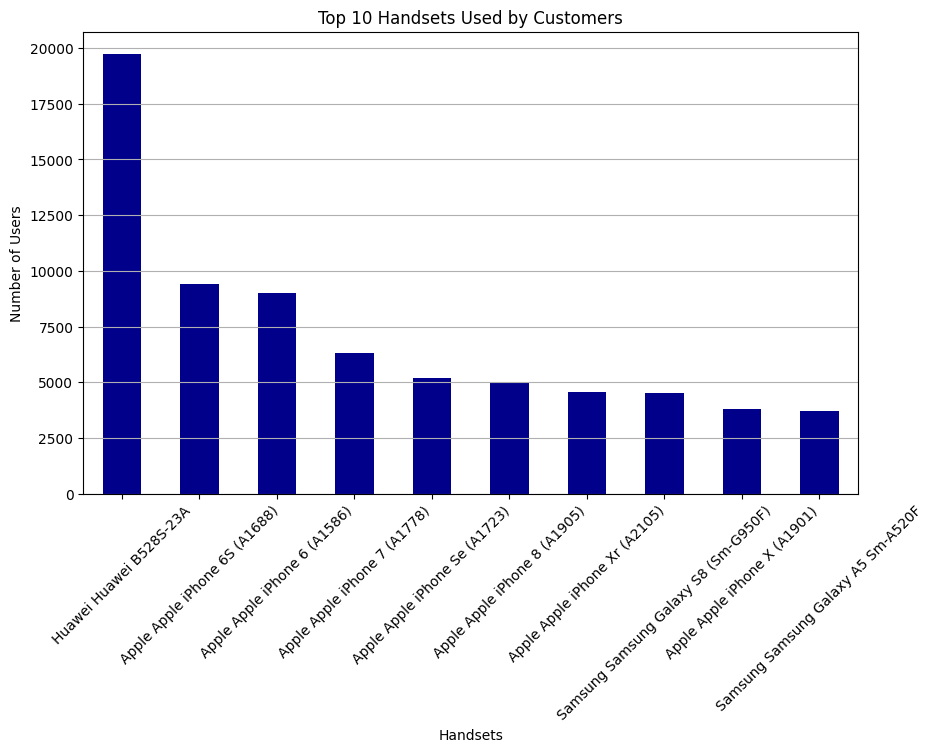

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Remove rows where Handset Manufacturer or Handset Type are undefined
xdr_handset_df=xdr_data_df[
    (xdr_data_df['Handset Manufacturer'] != 'undefined') &
    ( xdr_data_df['Handset Type'] !="undefined")]
   
# Combine the two columns to create a full handset description
xdr_handset_df['Handset'] = xdr_handset_df['Handset Manufacturer'] + ' ' + xdr_handset_df['Handset Type']

# Group by the full handset description and count occurrences
handset_counts = xdr_handset_df['Handset'].value_counts()

# Select the top 10 handsets
top_10_handsets = handset_counts.head(10)

# Display the results
print("Top 10 Handsets Used by Customers:")
print(top_10_handsets)

# Visualization
plt.figure(figsize=(10, 6))
top_10_handsets.plot(kind='bar', color='darkblue')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handsets')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### we also count the top 3 manufacturers of the handset and plot it

top 3 manufacturer of handset
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


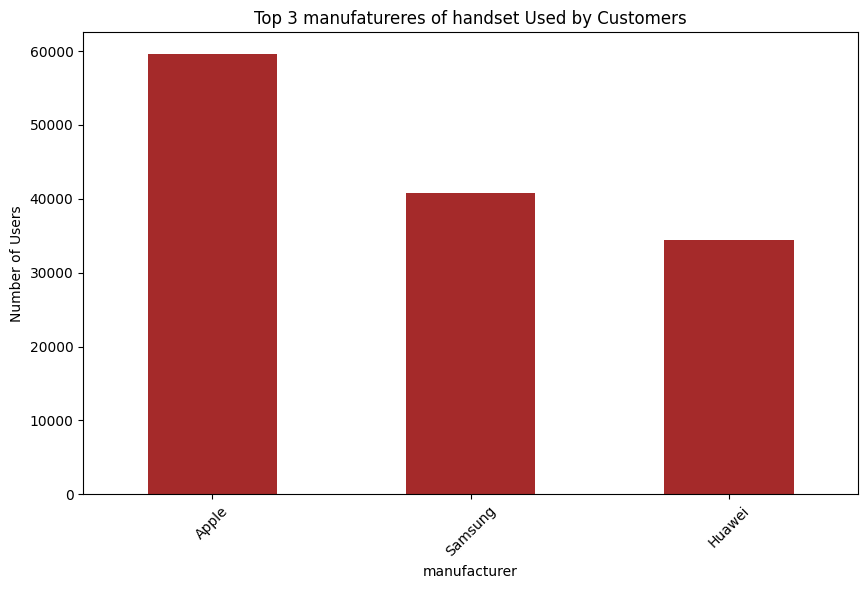

In [22]:
manufacturer_count = xdr_handset_df['Handset Manufacturer'].value_counts()
print ('top 3 manufacturer of handset')
top_3_manufacturer= manufacturer_count.head(3)
print(top_3_manufacturer)

# Visualization
plt.figure(figsize=(10, 6))
top_3_manufacturer.plot(kind='bar', color='brown')
plt.title('Top 3 manufatureres of handset Used by Customers')
plt.xlabel('manufacturer')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

##### then from this top 3 manufacturer we filtered out and value count the top 5 handsets that manufactured by the top 3 manufacturer


Top 5 Handsets from the Top 3 Manufacturers:
Handset Type
Huawei B528S-23A           19752
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
Apple iPhone 7 (A1778)      6326
Apple iPhone Se (A1723)     5187
Name: count, dtype: int64


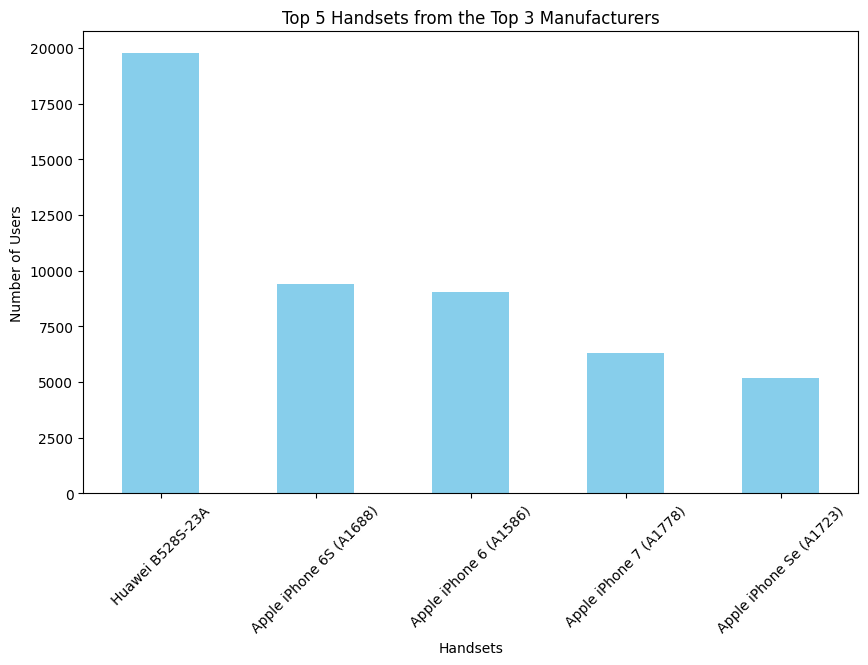

In [23]:
# Step 2: Filter the dataset for the top 3 manufacturers
top_3_manufacturer_names = top_3_manufacturer.index.tolist()  # Get the names of the top 3 manufacturers
filtered_handsets = xdr_handset_df[xdr_handset_df['Handset Manufacturer'].isin(top_3_manufacturer_names)]

# Step 3: Count handsets for these manufacturers
handset_counts = filtered_handsets['Handset Type'].value_counts().head(5)  # Get top 5 handsets

print('\nTop 5 Handsets from the Top 3 Manufacturers:')
print(handset_counts)

# Visualization for top 5 handsets
plt.figure(figsize=(10, 6))
handset_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Handsets from the Top 3 Manufacturers')
plt.xlabel('Handsets')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

## fill the missing values
#### so we specify columns with double precision values ,count the missing values of them and fill them with their mean value for further analysis and model trainig

In [24]:
# Specify the columns for which you want to fill missing values
columns_to_fill = [
    "DL TP < 50 Kbps (%)",
    "50 Kbps < DL TP < 250 Kbps (%)",
    "250 Kbps < DL TP < 1 Mbps (%)",
    "DL TP > 1 Mbps (%)",
    "UL TP < 10 Kbps (%)",
    "10 Kbps < UL TP < 50 Kbps (%)",
    "50 Kbps < UL TP < 300 Kbps (%)",
    "UL TP > 300 Kbps (%)",
    "HTTP DL (Bytes)",
    "HTTP UL (Bytes)",
    "Activity Duration DL (ms)",
    "Activity Duration UL (ms)",
    "Dur. (ms).1",
    "Nb of sec with 125000B < Vol DL",
    "Nb of sec with 1250B < Vol UL < 6250B",
    "Nb of sec with 31250B < Vol DL < 125000B",
    "Nb of sec with 37500B < Vol UL",
    "Nb of sec with 6250B < Vol DL < 31250B",
    "Nb of sec with 6250B < Vol UL < 37500B",
    "Nb of sec with Vol DL < 6250B",
    "Nb of sec with Vol UL < 1250B",
    "Social Media DL (Bytes)",
    "Social Media UL (Bytes)",
    "Youtube DL (Bytes)",
    "Youtube UL (Bytes)",
    "Netflix DL (Bytes)",
    "Netflix UL (Bytes)",
    "Google DL (Bytes)",
    "Google UL (Bytes)",
    "Email DL (Bytes)",
    "Email UL (Bytes)",
    "Gaming DL (Bytes)",
    "Gaming UL (Bytes)",
    "Other DL (Bytes)",
    "Other UL (Bytes)",
    "Total DL (Bytes)",
    "Total UL (Bytes)",
    "Avg RTT UL (ms)",
    "Avg RTT DL (ms)",
    "Avg Bearer TP DL (kbps)",
    "Avg Bearer TP UL (kbps)",
    "TCP DL Retrans. Vol (Bytes)",
    "TCP UL Retrans. Vol (Bytes)",
    "Bearer Id",
    "IMSI" ,
    "MSISDN/Number",
    "IMEI",
    "Start ms" ,
    "End ms",
    "Dur. (ms)" ,

]

# Step 1: Check for missing values in the specified columns
missed = xdr_data_df[columns_to_fill].isnull().sum()
print("Missing values in specified columns:")
print(missed)

# Step 2: Fill missing values with the mean for the specified columns
xdr_data_df[columns_to_fill] = xdr_data_df[columns_to_fill].fillna(xdr_data_df[columns_to_fill].mean())

# Step 3: Verify that there are no more missing values in those columns
missed_after_fill = xdr_data_df[columns_to_fill].isnull().sum()
print("Missing values after filling with mean in specified columns:")
print(missed_after_fill)



Missing values in specified columns:
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)                           792
HTTP DL (Bytes)                              81474
HTTP UL (Bytes)                              81810
Activity Duration DL (ms)                        1
Activity Duration UL (ms)                        1
Dur. (ms).1                                      1
Nb of sec with 125000B < Vol DL              97538
Nb of sec with 1250B < Vol UL < 6250B        92894
Nb of sec with 31250B < Vol DL < 125000B     93586
Nb of sec with 37500B < Vol UL              130254
Nb of sec with 6250B < Vol DL < 31250B       88317
Nb of sec with 6250B < Vol UL < 37500B      1

## fill the string values
#### then we specify columns with string values to fill their missed values with undefined

In [25]:
# Specify the columns to fill with "undefined"
columns_to_fill_text = [ 
    'Start',
    'End',
    'Last Location Name',
    'Handset Manufacturer',
    'Handset Type'
]

# Fill missing values in the specified columns with "undefined"
for column in columns_to_fill_text:  # Corrected to use columns_to_fill_text
    xdr_data_df[column].fillna("undefined", inplace=True)

# Verify that there are no more missing values in the specified columns
missed_after_fill = xdr_data_df[columns_to_fill_text].isnull().sum()
print("Missing values after filling with 'undefined':")
print(missed_after_fill)


Missing values after filling with 'undefined':
Start                   0
End                     0
Last Location Name      0
Handset Manufacturer    0
Handset Type            0
dtype: int64


C:\Users\sumey\AppData\Local\Temp\ipykernel_29648\391777328.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xdr_data_df[column].fillna("undefined", inplace=True)


## select the relevant numeric columns as a data file to do further analysis and check if there is any null value in there

In [26]:


# Select the relevant numeric columns
relevant_columns = [
    "DL TP < 50 Kbps (%)",
    "50 Kbps < DL TP < 250 Kbps (%)",
    "250 Kbps < DL TP < 1 Mbps (%)",
    "DL TP > 1 Mbps (%)",
    "UL TP < 10 Kbps (%)",
    "10 Kbps < UL TP < 50 Kbps (%)",
    "50 Kbps < UL TP < 300 Kbps (%)",
    "UL TP > 300 Kbps (%)",
    "HTTP DL (Bytes)",
    "HTTP UL (Bytes)",
    "Activity Duration DL (ms)",
    "Activity Duration UL (ms)",
    "Dur. (ms).1",
    "Nb of sec with 125000B < Vol DL",
    "Nb of sec with 1250B < Vol UL < 6250B",
    "Nb of sec with 31250B < Vol DL < 125000B",
    "Nb of sec with 37500B < Vol UL",
    "Nb of sec with 6250B < Vol DL < 31250B",
    "Nb of sec with 6250B < Vol UL < 37500B",
    "Nb of sec with Vol DL < 6250B",
    "Nb of sec with Vol UL < 1250B",
    "Social Media DL (Bytes)",
    "Social Media UL (Bytes)",
    "Youtube DL (Bytes)",
    "Youtube UL (Bytes)",
    "Netflix DL (Bytes)",
    "Netflix UL (Bytes)",
    "Google DL (Bytes)",
    "Google UL (Bytes)",
    "Email DL (Bytes)",
    "Email UL (Bytes)",
    "Gaming DL (Bytes)",
    "Gaming UL (Bytes)",
    "Other DL (Bytes)",
    "Other UL (Bytes)",
    "Total DL (Bytes)",
    "Total UL (Bytes)",
    "Avg RTT UL (ms)",
    "Avg RTT DL (ms)",
    "Avg Bearer TP DL (kbps)",
    "Avg Bearer TP UL (kbps)",
    "TCP DL Retrans. Vol (Bytes)",
    "TCP UL Retrans. Vol (Bytes)"
]

# Create a DataFrame with only the relevant columns
relevant_data = xdr_data_df[relevant_columns]

# Check for missing values
missing_values = relevant_data.isnull().sum()

# Display missing values count for each relevant column
print("Missing Values Count:")
print(missing_values[missing_values > 0])


Missing Values Count:
Series([], dtype: int64)


##### fill if there is any null value and print the number of missed value to check

In [27]:

# Fill missing values with the mean of each column
relevant_data.fillna(relevant_data.mean(), inplace=True)

# Optional: Verify that missing values have been filled
missing_values_after = relevant_data.isnull().sum()
print("\nMissing Values Count After Filling:")
print(missing_values_after)



Missing Values Count After Filling:
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)               0
50 Kbps < UL TP < 300 Kbps (%)              0
UL TP > 300 Kbps (%)                        0
HTTP DL (Bytes)                             0
HTTP UL (Bytes)                             0
Activity Duration DL (ms)                   0
Activity Duration UL (ms)                   0
Dur. (ms).1                                 0
Nb of sec with 125000B < Vol DL             0
Nb of sec with 1250B < Vol UL < 6250B       0
Nb of sec with 31250B < Vol DL < 125000B    0
Nb of sec with 37500B < Vol UL              0
Nb of sec with 6250B < Vol DL < 31250B      0
Nb of sec with 6250B < Vol UL < 37500B      0
Nb of sec with Vol DL < 6250B               0
Nb of sec with Vol UL < 1250B              

C:\Users\sumey\AppData\Local\Temp\ipykernel_29648\1164986004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data.fillna(relevant_data.mean(), inplace=True)


#### we calculates and visualizes key statistics (mean, median, and standard deviation) for average round-trip times (RTT) in both download (DL) and upload (UL) directions from a dataset. First, we compute these metrics and organizes them in a DataFrame. Then, we generate a bar chart to visually compare these RTT statistics, providing insights into the data's central tendency and variability.

                       Mean  Median  Standard Deviation
Avg RTT DL (ms)  109.795706    54.0          559.342620
Avg RTT UL (ms)   17.662883     7.0           76.529933


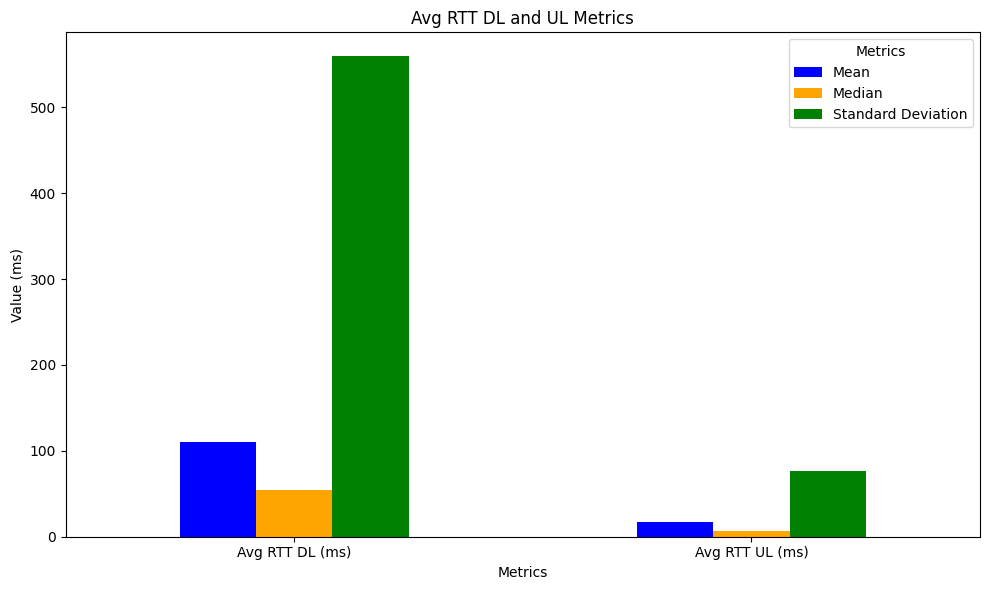

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have a DataFrame named `relevant_data` with your data

# Calculate mean, median, and standard deviation for Avg RTT DL and UL
rtt_metrics = {
    "Mean": [relevant_data["Avg RTT DL (ms)"].mean(), relevant_data["Avg RTT UL (ms)"].mean()],
    "Median": [relevant_data["Avg RTT DL (ms)"].median(), relevant_data["Avg RTT UL (ms)"].median()],
    "Standard Deviation": [relevant_data["Avg RTT DL (ms)"].std(), relevant_data["Avg RTT UL (ms)"].std()],
}

# Create a DataFrame for metrics
rtt_metrics_df = pd.DataFrame(rtt_metrics, index=["Avg RTT DL (ms)", "Avg RTT UL (ms)"])

# Display the metrics DataFrame
print(rtt_metrics_df)

# Plotting the metrics
plt.figure(figsize=(10, 6))
rtt_metrics_df.plot(kind='bar', ax=plt.gca(), color=['blue', 'orange', 'green'])
plt.title('Avg RTT DL and UL Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value (ms)')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()  # Display the plot


### we calculates and visualizes key statistics (mean, median, standard deviation,min and max) for Avg Bearer,Transmission Control Protocol(TCP)  Retrans. Vol (Bytes) in both download (DL) and upload (UL) directions from a dataset.  we computes these metrics and organizes them in a DataFrame and generates print the result

In [29]:


# Select the relevant columns
stats_columns = [
    "Avg Bearer TP DL (kbps)",
    "Avg Bearer TP UL (kbps)",
    "TCP DL Retrans. Vol (Bytes)",
    "TCP UL Retrans. Vol (Bytes)",
    "HTTP DL (Bytes)",
     "HTTP UL (Bytes)"
]

# Calculate basic statistics
statistics = {}
for column in stats_columns:
    statistics[column] = {
        "Mean": relevant_data[column].mean(),
        "Median": relevant_data[column].median(),
        "Standard Deviation": relevant_data[column].std(),
        "Minimum": relevant_data[column].min(),
        "Maximum": relevant_data[column].max()
    }

# Convert the statistics to a DataFrame for better readability
statistics_df = pd.DataFrame(statistics)

# Display the statistics
print(statistics_df)


                    Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
Mean                           13300.045927              1770.428647   
Median                            63.000000                63.000000   
Standard Deviation             23971.798635              4625.340082   
Minimum                            0.000000                 0.000000   
Maximum                       378160.000000             58613.000000   

                    TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
Mean                               2.080991e+07                 7.596587e+05   
Median                             2.080991e+07                 7.596587e+05   
Standard Deviation                 1.172356e+08                 1.577616e+07   
Minimum                            2.000000e+00                 1.000000e+00   
Maximum                            4.294426e+09                 2.908226e+09   

                    HTTP DL (Bytes)  HTTP UL (Bytes)  
Mean                   1.144710

#####  we creates a DataFrame avg_barrer_df to store average bearer throughput (TP) for uplink (UL) and downlink (DL) from statistics_df(as we do basic statics first). It then plots the data as a bar chart to visualize the UL and DL throughput in kbps, with labeled axes and a legend for clarity.

<Figure size 1000x600 with 0 Axes>

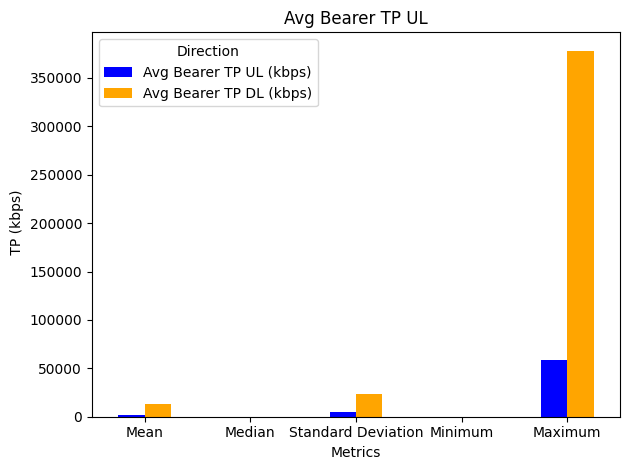

In [30]:
# Create a DataFrame Avg Bearer TP UL
avg_barrer_df = pd.DataFrame({
    "Avg Bearer TP UL (kbps)": statistics_df["Avg Bearer TP UL (kbps)"],
    "Avg Bearer TP DL (kbps)": statistics_df["Avg Bearer TP DL (kbps)"]
})

# Plotting the metrics
plt.figure(figsize=(10, 6))
avg_barrer_df.plot(kind='bar', color=['blue', 'orange'])
plt.title('Avg Bearer TP UL')
plt.xlabel('Metrics')
plt.ylabel(' TP (kbps)')
plt.xticks(rotation=0)
plt.legend(title='Direction')
plt.tight_layout()
plt.show()  # Display the plot

#####  we creates a DataFrame TCP_df to store  Transmission Control Protocol(TCP) Retrans. Vol (Bytes) for uplink (UL) and downlink (DL) from statistics_df(as we do the  basic statics first). It then plots the data as a bar chart to visualize the UL and DL throughput in kbps, with labeled axes and a legend for clarity.

<Figure size 1000x600 with 0 Axes>

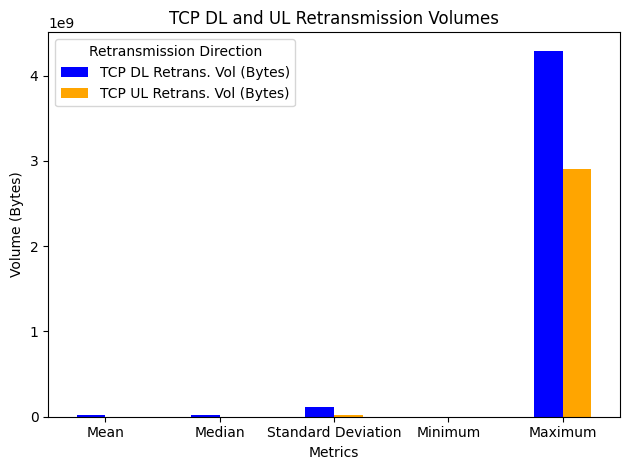

In [31]:

# Create a DataFrame for TCP Retransmission Volume statistics
TCP_df = pd.DataFrame({
    "TCP DL Retrans. Vol (Bytes)": statistics_df["TCP DL Retrans. Vol (Bytes)"],
    "TCP UL Retrans. Vol (Bytes)": statistics_df["TCP UL Retrans. Vol (Bytes)"]
})

# Plotting the metrics
plt.figure(figsize=(10, 6))
TCP_df.plot(kind='bar', color=['blue', 'orange'])
plt.title('TCP DL and UL Retransmission Volumes')
plt.xlabel('Metrics')
plt.ylabel('Volume (Bytes)')
plt.xticks(rotation=0)
plt.legend(title='Retransmission Direction')
plt.tight_layout()
plt.show()  # Display the plot



#####  we creates a DataFrame http_df to store HTTP DL (Bytes) for uplink (UL) and downlink (DL) from statistics_df(as we do the  basic statics first). It then plots the data as a bar chart to visualize the UL and DL throughput in kbps, with labeled axes and a legend for clarity.

<Figure size 1000x600 with 0 Axes>

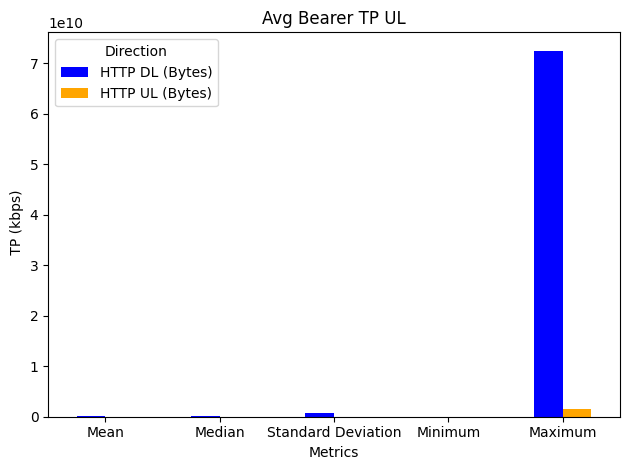

In [32]:
# Create a DataFrame Avg Bearer TP UL
http_df = pd.DataFrame({
    "HTTP DL (Bytes)":statistics_df["HTTP DL (Bytes)"],
    "HTTP UL (Bytes)": statistics_df["HTTP UL (Bytes)"]
})

# Plotting the metrics
plt.figure(figsize=(10, 6))
http_df.plot(kind='bar', color=['blue', 'orange'])
plt.title('Avg Bearer TP UL')
plt.xlabel('Metrics')
plt.ylabel(' TP (kbps)')
plt.xticks(rotation=0)
plt.legend(title='Direction')
plt.tight_layout()
plt.show()  # Display the plot

This code analyzes specific percentage columns in a DataFrame (relevant_data) by counting rows that fall into five threshold categories (100%, 75%-99%, 50%-74%, 25%-49%, <25%). It first checks for duplicate column names, then iterates over each specified column to calculate and store the counts per threshold in a new DataFrame, threshold_counts.

In [33]:
import pandas as pd

# Sample structure of the DataFrame with columns to analyze
columns_to_analyze = [
    "DL TP < 50 Kbps (%)",
    "50 Kbps < DL TP < 250 Kbps (%)",
    "250 Kbps < DL TP < 1 Mbps (%)",
    "DL TP > 1 Mbps (%)",
    "UL TP < 10 Kbps (%)",
    "10 Kbps < UL TP < 50 Kbps (%)",
    "50 Kbps < UL TP < 300 Kbps (%)",
    "UL TP > 300 Kbps (%)"
]

# Check for duplicate column names in relevant_data
if relevant_data.columns.duplicated().any():
    print("Warning: Duplicate column names found. Please ensure column names are unique.")
else:
    print("No duplicate column names detected.")

# Initialize an empty DataFrame to store results
threshold_counts = pd.DataFrame(index=['100%', '75%', '50%', '25%', '< 25%'], columns=columns_to_analyze)

# Loop through each column and calculate thresholds
for column in columns_to_analyze:
    if column in relevant_data.columns:
        threshold_counts.loc['100%', column] = relevant_data[relevant_data[column] == 100].shape[0]
        threshold_counts.loc['75%', column] = relevant_data[(relevant_data[column] >= 75) & (relevant_data[column] < 100)].shape[0]
        threshold_counts.loc['50%', column] = relevant_data[(relevant_data[column] >= 50) & (relevant_data[column] < 75)].shape[0]
        threshold_counts.loc['25%', column] = relevant_data[(relevant_data[column] >= 25) & (relevant_data[column] < 50)].shape[0]
        threshold_counts.loc['< 25%', column] = relevant_data[relevant_data[column] < 25].shape[0]
    else:
        print(f"Warning: Column '{column}' not found in relevant_data.")

# Display the counts DataFrame
print("Threshold Counts for Each Column:")
print(threshold_counts)





No duplicate column names detected.
Threshold Counts for Each Column:
      DL TP < 50 Kbps (%) 50 Kbps < DL TP < 250 Kbps (%)  \
100%                87044                              0   
75%                 47551                             10   
50%                 12911                            142   
25%                  2285                           2198   
< 25%                 210                         147651   

      250 Kbps < DL TP < 1 Mbps (%) DL TP > 1 Mbps (%) UL TP < 10 Kbps (%)  \
100%                              1                  0               91663   
75%                               1                 14               57256   
50%                              63                108                 793   
25%                             686               1449                 222   
< 25%                        149250             148430                  67   

      10 Kbps < UL TP < 50 Kbps (%) 50 Kbps < UL TP < 300 Kbps (%)  \
100%                          

<Figure size 1200x800 with 0 Axes>

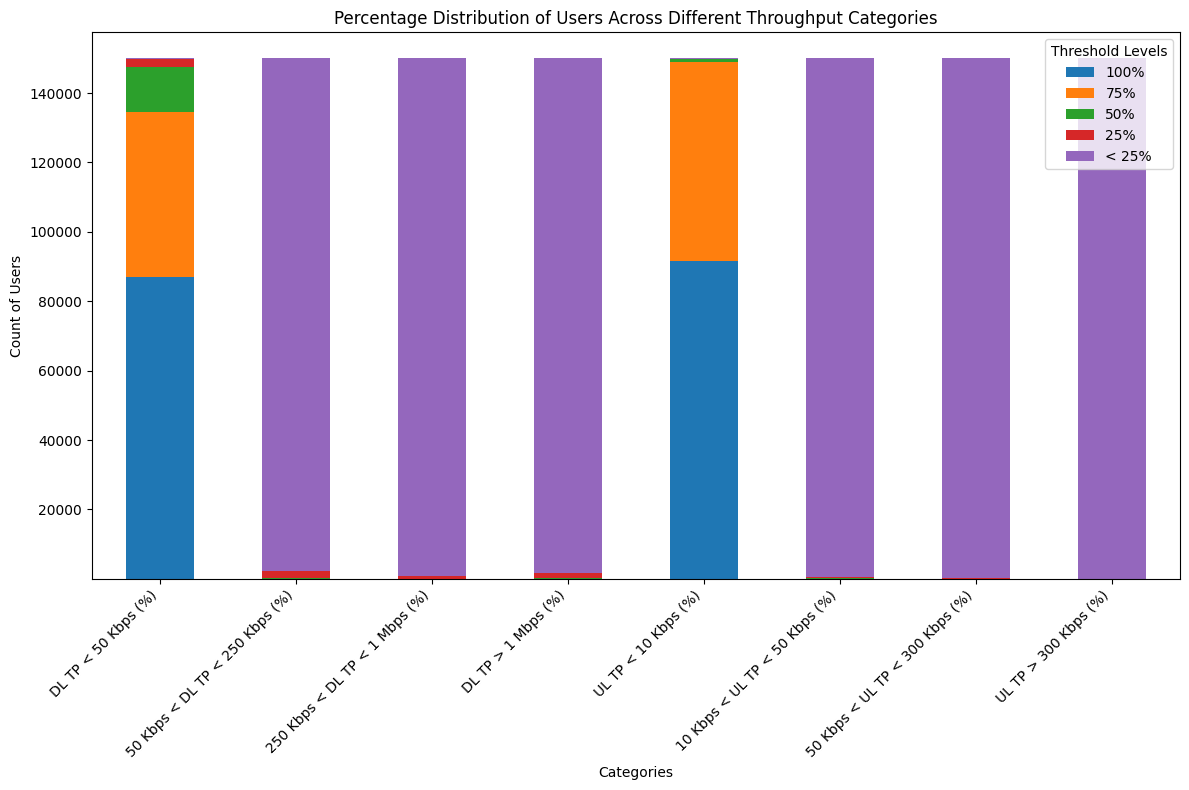

In [34]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot the threshold counts using a stacked bar plot
threshold_counts.T.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], figsize=(12, 8))

# Add titles and labels
plt.title("Percentage Distribution of Users Across Different Throughput Categories")

plt.xlabel("Categories")
plt.ylabel("Count of Users")
plt.legend(title="Threshold Levels", loc="upper right")
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.show()


In [39]:
from sqlalchemy import create_engine
import pandas as pd

# Database connection parameters
host = 'localhost'
port = '5432'
dbname = 'telecommunication'
user = 'postgres'
password = 'aym'

# Create the database engine
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}')

# Save the DataFrame to PostgreSQL
xdr_data_df.to_sql('processed_xdr_data', engine, if_exists='replace', index=False)

print("Data successfully saved to PostgreSQL database.")


Data successfully saved to PostgreSQL database.


In [40]:
import pandas as pd


# Aggregate per user
aggregated_data = xdr_data_df.groupby('MSISDN/Number').agg({
    # Count the sessions per user
    'Bearer Id': 'count',  # Replace 'Session ID' with your session identifier column
    
    # Sum session durations
    'Dur. (ms).1': 'sum',
    
    # Sum DL and UL data for each application
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
})

# Rename the session count and duration columns
aggregated_data = aggregated_data.rename(columns={'Session ID': 'Number of xDR Sessions', 'Dur. (ms).1': 'Total Session Duration (ms)'})

# Calculate the total data volume (DL + UL) for each application
applications = ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']
for app in applications:
    dl_column = f"{app} DL (Bytes)"
    ul_column = f"{app} UL (Bytes)"
    aggregated_data[f"{app} Total Volume (Bytes)"] = aggregated_data[dl_column] + aggregated_data[ul_column]

# Display the aggregated data
print(aggregated_data)


               Bearer Id  Total Session Duration (ms)  \
MSISDN/Number                                           
3.360100e+10           1                 1.167201e+08   
3.360100e+10           1                 1.812310e+08   
3.360100e+10           1                 1.349694e+08   
3.360101e+10           1                 4.987802e+07   
3.360101e+10           2                 3.710445e+07   
...                  ...                          ...   
3.379000e+10           1                 1.409887e+08   
4.188282e+10        1066                 7.255155e+10   
3.197021e+12           1                 8.773853e+08   
3.370000e+14           1                 2.530302e+08   
8.823971e+14           1                 8.698442e+08   

               Social Media DL (Bytes)  Social Media UL (Bytes)  \
MSISDN/Number                                                     
3.360100e+10              2.206504e+06             2.563100e+04   
3.360100e+10              2.598548e+06             6.2017

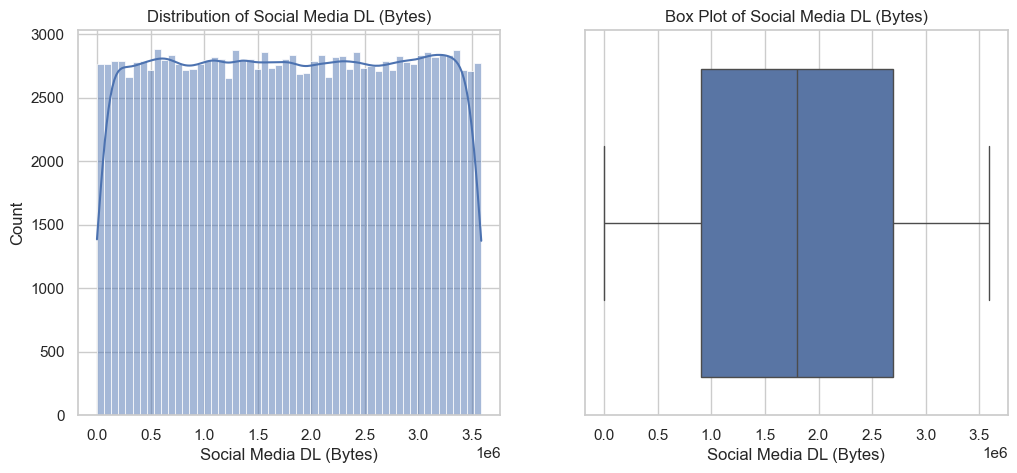

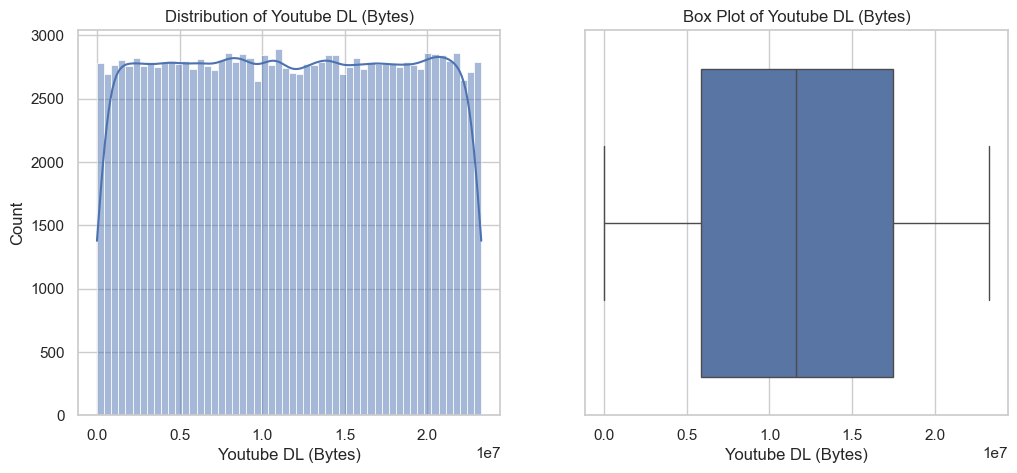

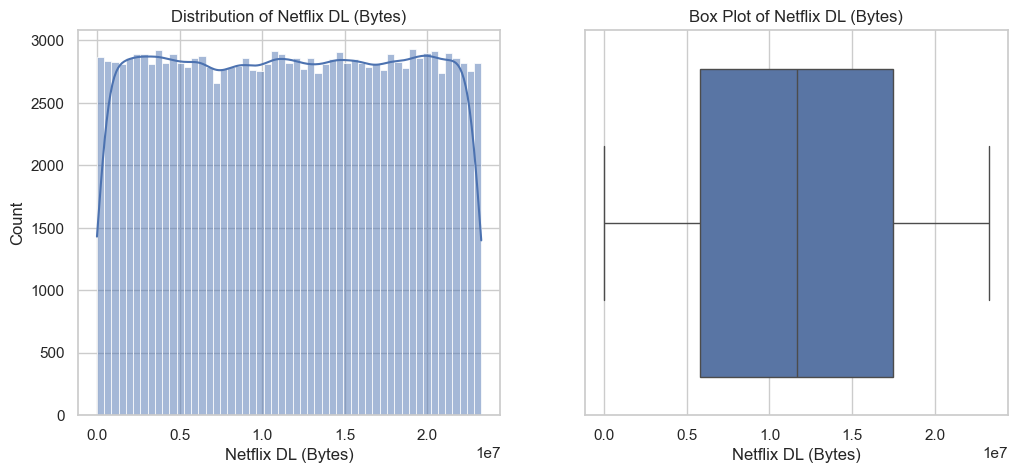

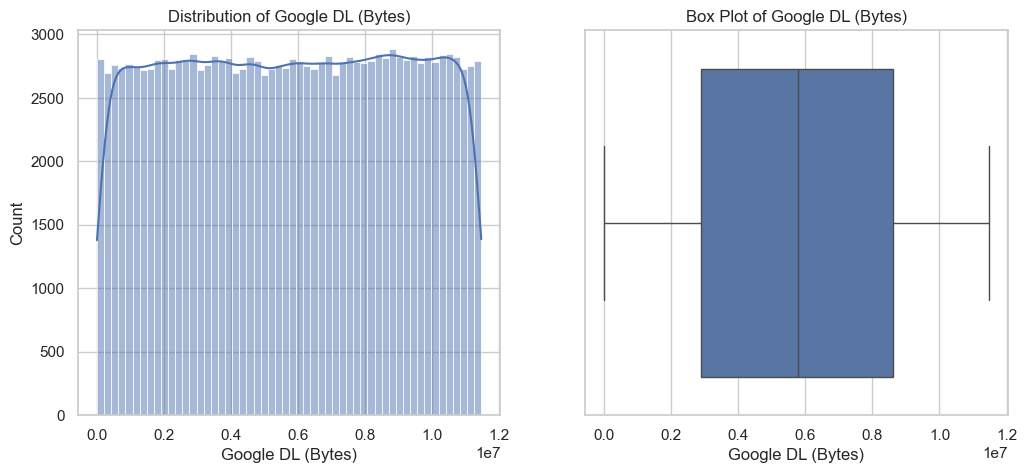

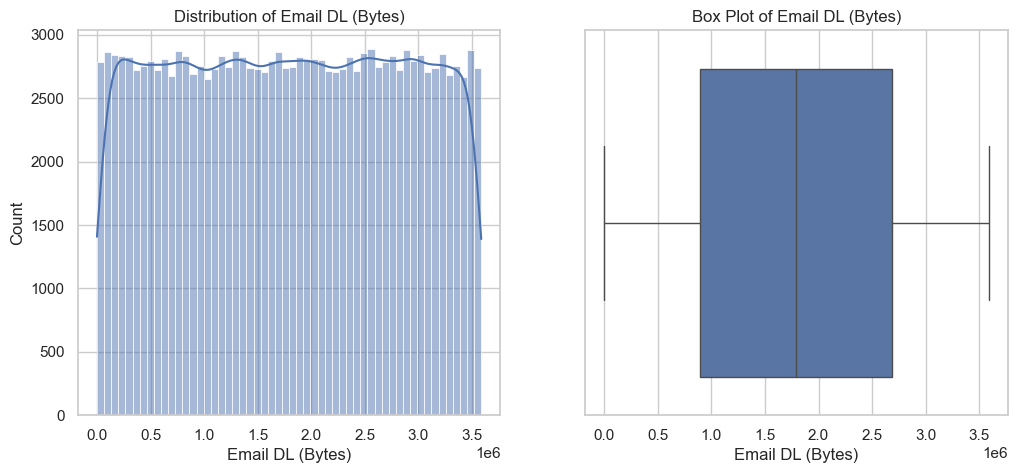

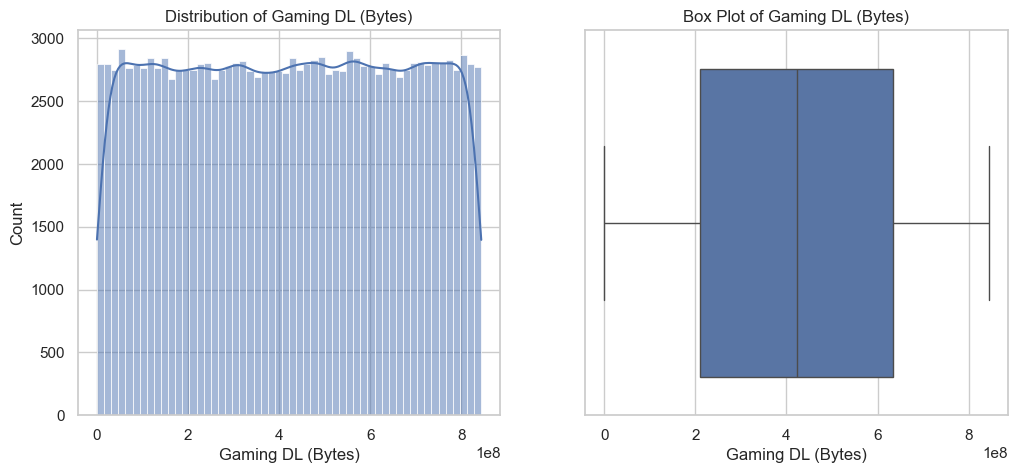

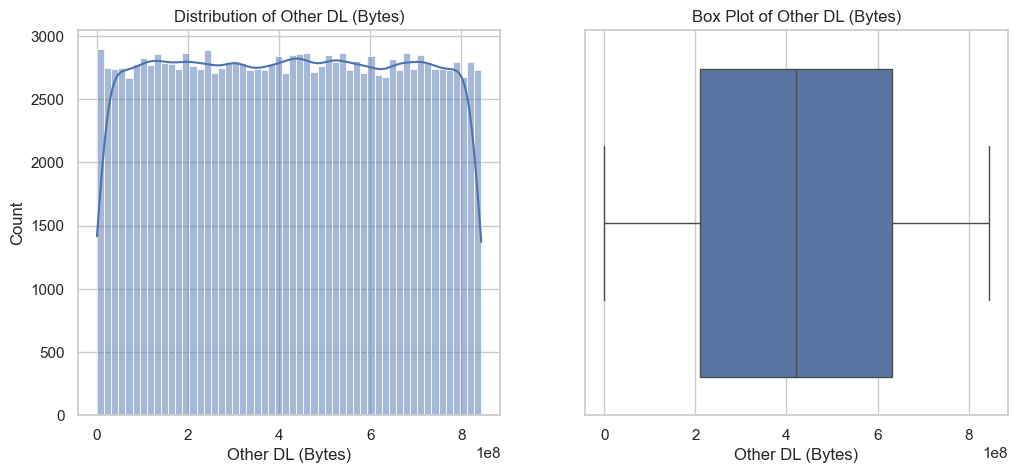

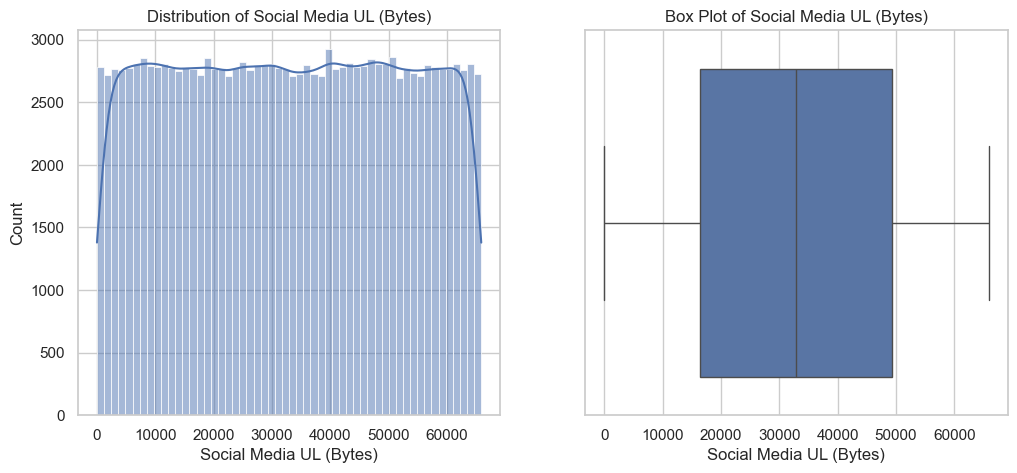

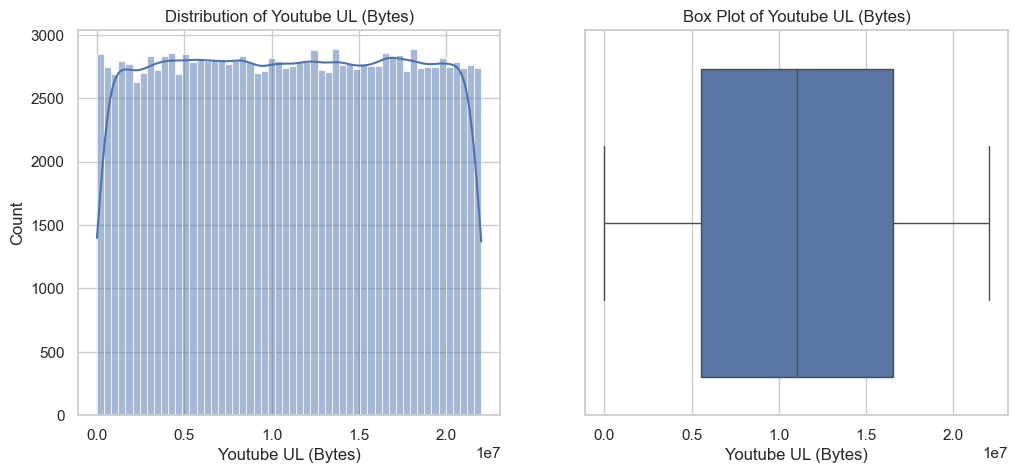

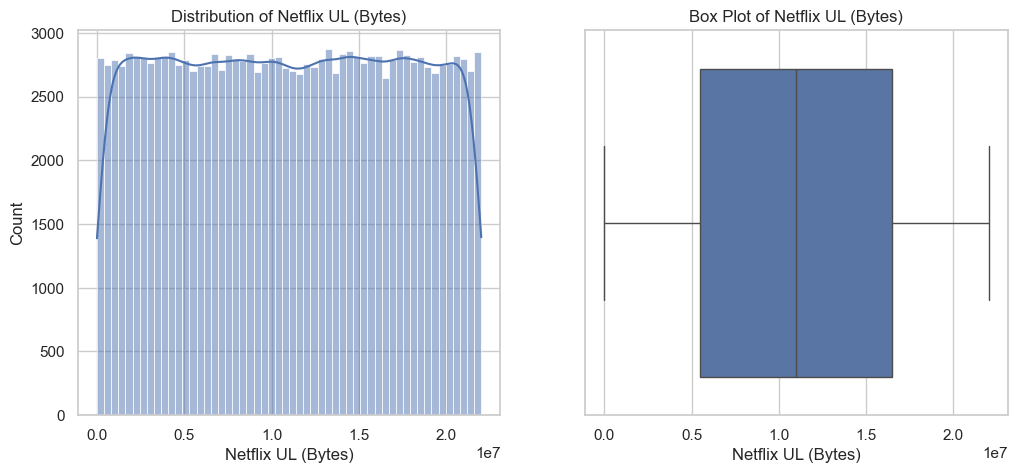

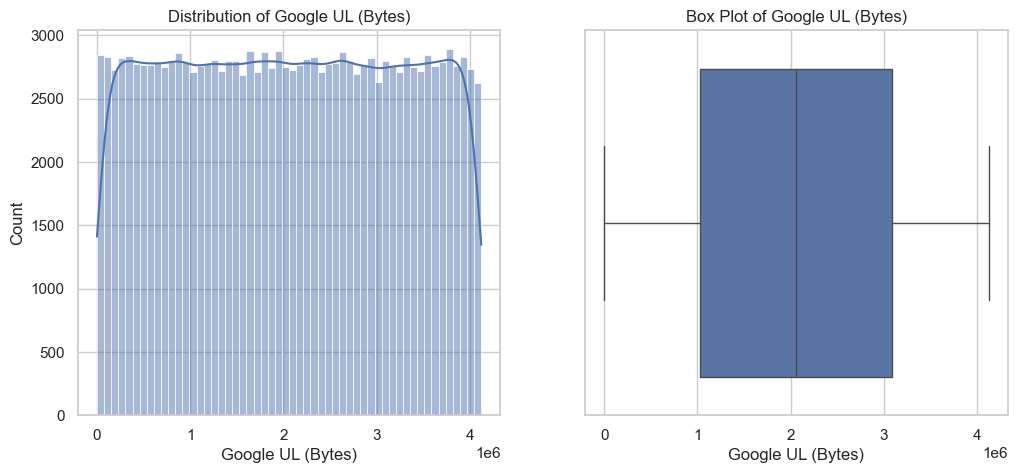

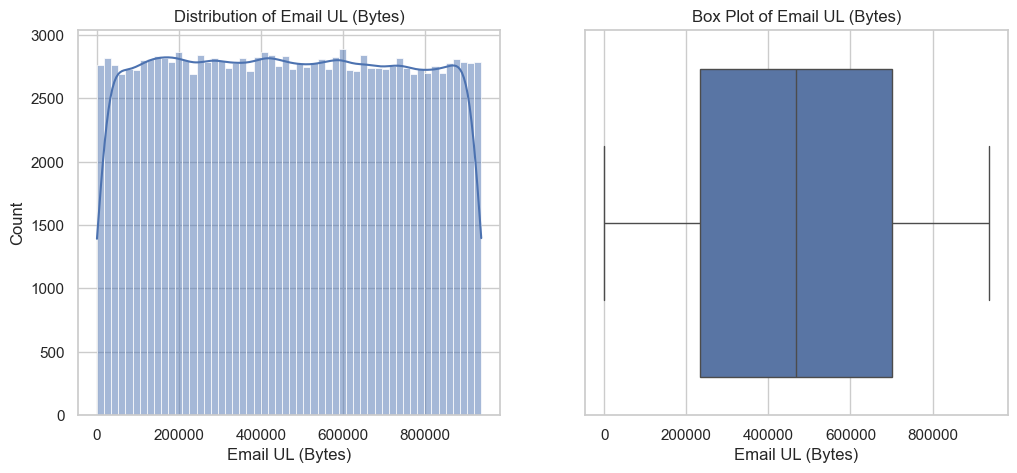

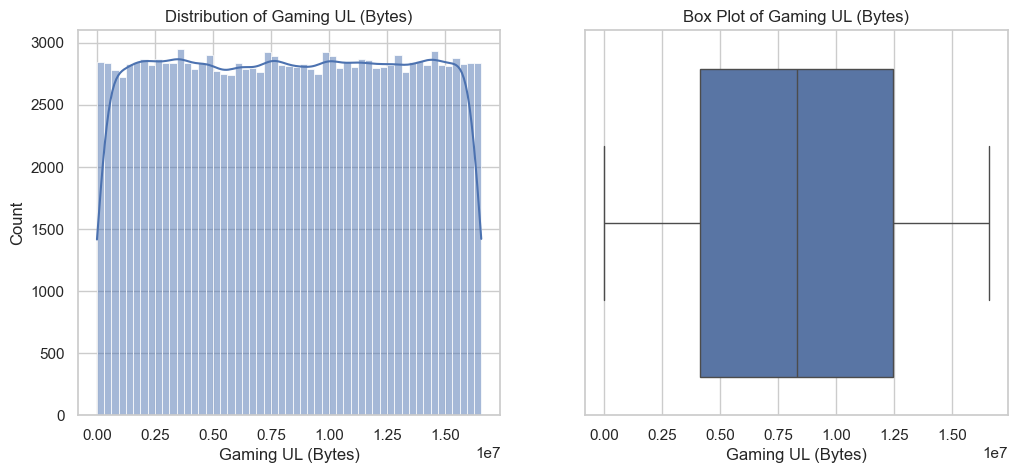

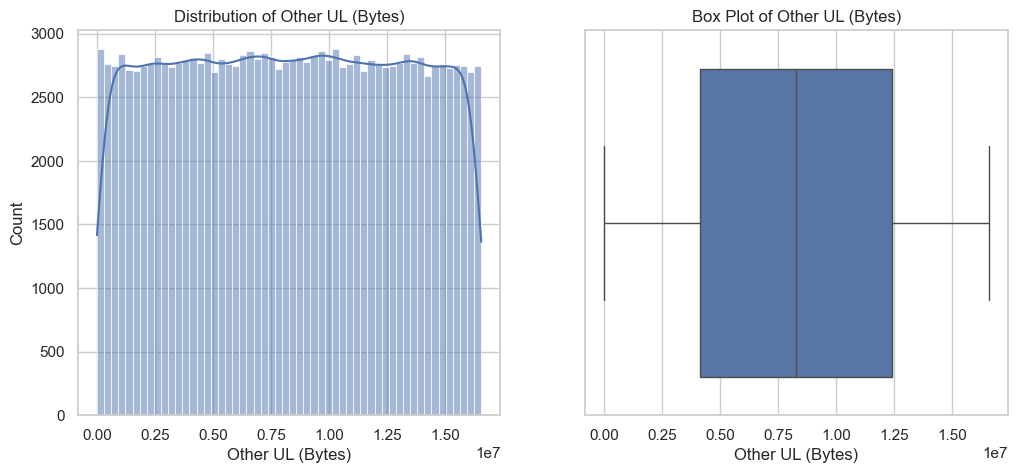

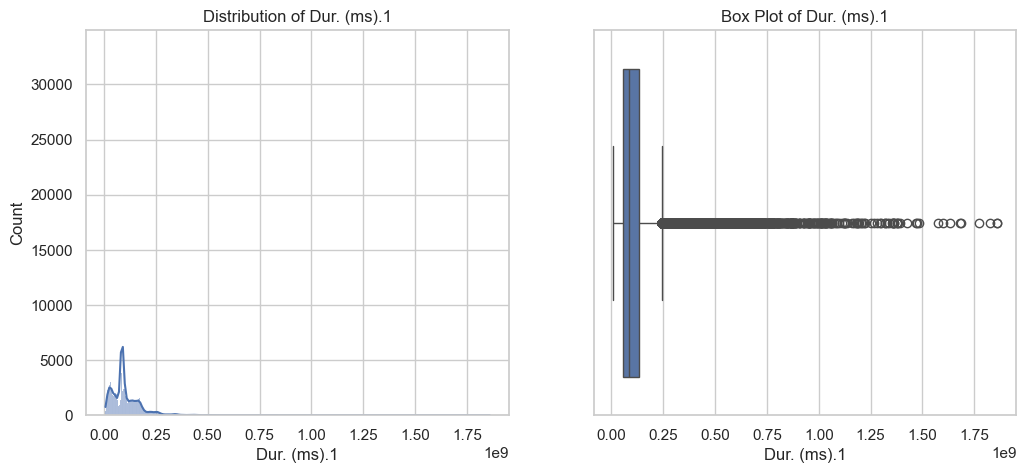

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# For continuous variables: Histogram and Box Plot
for col in ['Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 
            'Google DL (Bytes)', 'Email DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)',
            'Social Media UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)',
            'Google UL (Bytes)', 'Email UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)', 
            'Dur. (ms).1']:
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(xdr_data_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=xdr_data_df[col])
    plt.title(f'Box Plot of {col}')
    
    plt.show()


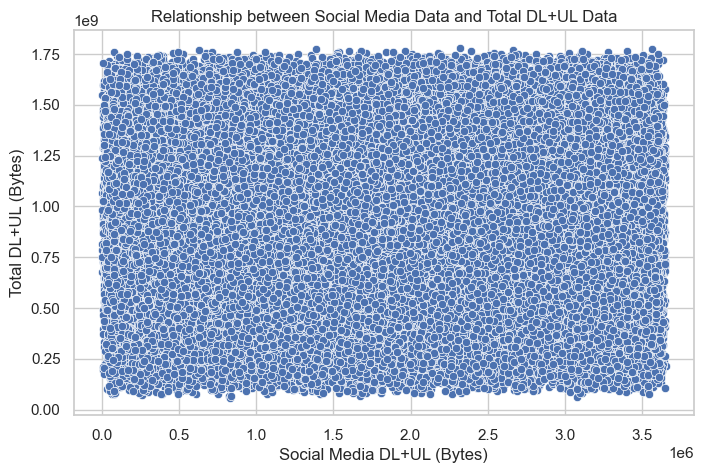

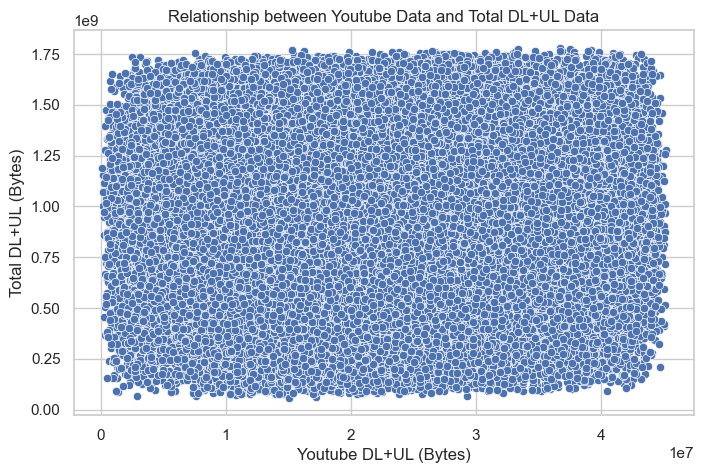

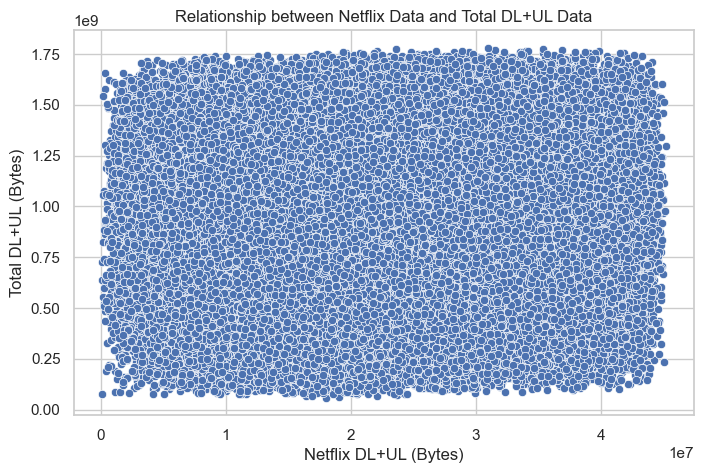

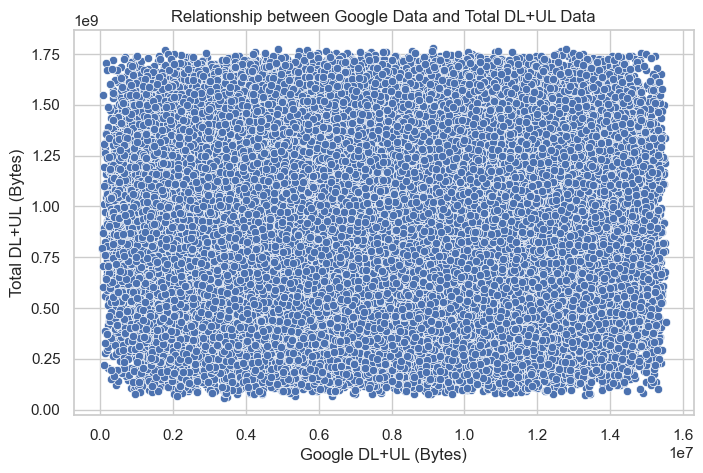

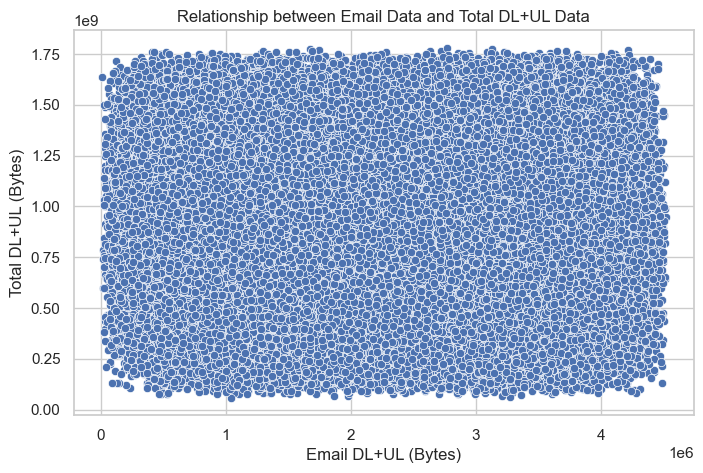

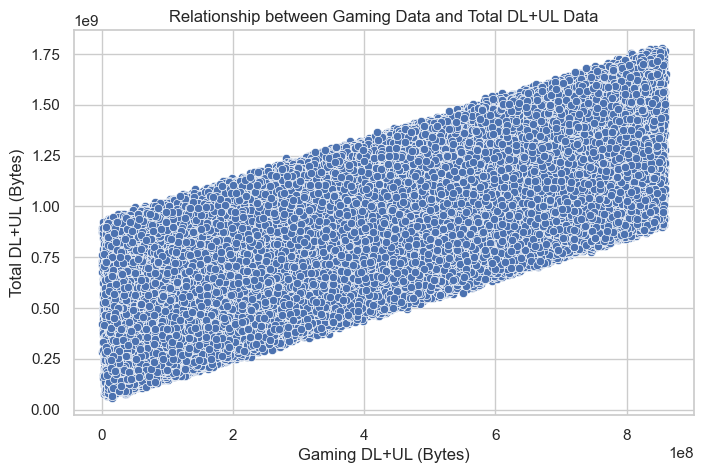

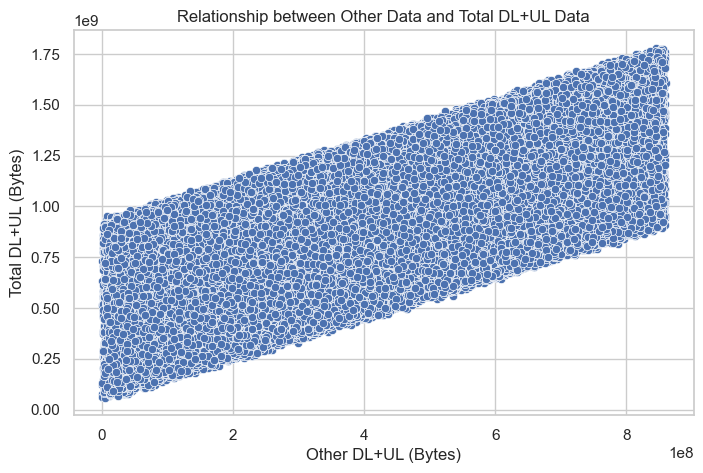

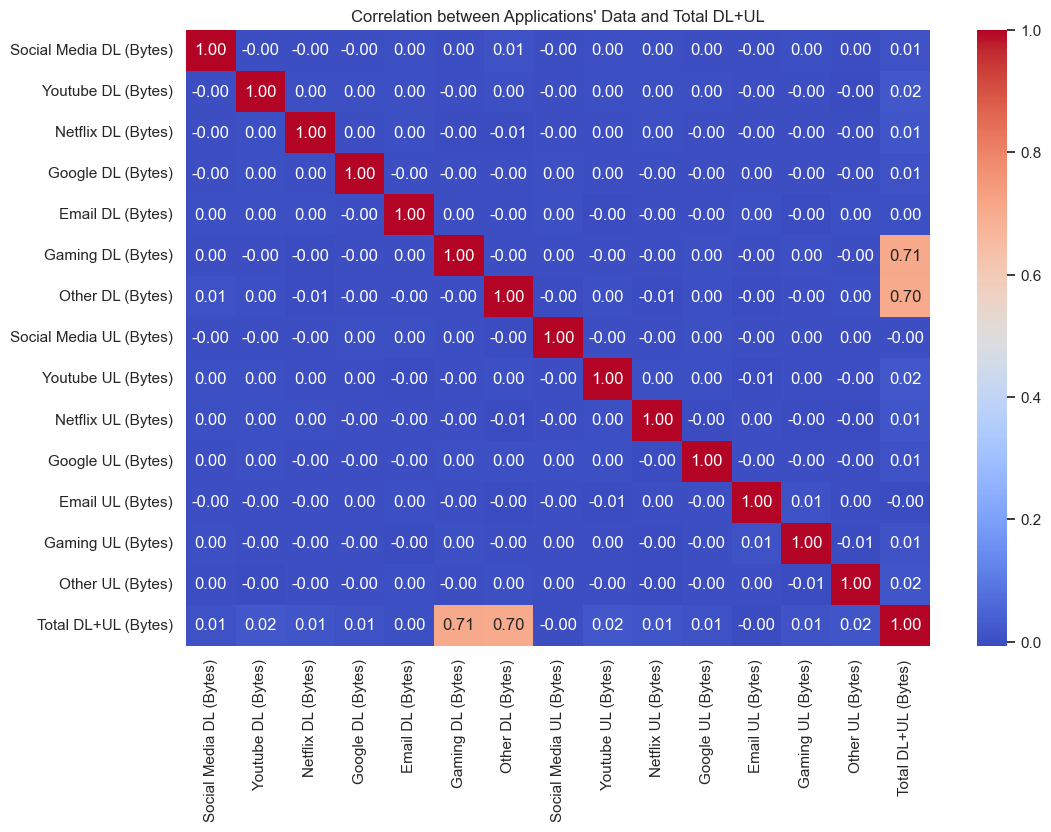

In [42]:
# Adding a column for Total DL + UL data for all applications
xdr_data_df['Total DL+UL (Bytes)'] = xdr_data_df['Social Media DL (Bytes)'] + (xdr_data_df['Social Media UL (Bytes)'] +
                            xdr_data_df['Youtube DL (Bytes)'] + xdr_data_df['Youtube UL (Bytes)'] +
                             xdr_data_df['Netflix DL (Bytes)'] + xdr_data_df['Netflix UL (Bytes)'] +
                             xdr_data_df['Google DL (Bytes)'] +xdr_data_df['Google UL (Bytes)'] +
                            xdr_data_df['Email DL (Bytes)'] + xdr_data_df['Email UL (Bytes)'] +
                             xdr_data_df['Gaming DL (Bytes)'] +xdr_data_df['Gaming UL (Bytes)'] +
                             xdr_data_df['Other DL (Bytes)'] + xdr_data_df['Other UL (Bytes)'])

# Scatter plot of each application vs Total DL+UL data
applications = ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']
for app in applications:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=xdr_data_df[f'{app} DL (Bytes)'] +xdr_data_df[f'{app} UL (Bytes)'], y=xdr_data_df['Total DL+UL (Bytes)'])
    plt.title(f'Relationship between {app} Data and Total DL+UL Data')
    plt.xlabel(f'{app} DL+UL (Bytes)')
    plt.ylabel('Total DL+UL (Bytes)')
    plt.show()

# Correlation Heatmap
correlation_df = xdr_data_df[[f'{app} DL (Bytes)' for app in applications] + 
                    [f'{app} UL (Bytes)' for app in applications] + ['Total DL+UL (Bytes)']]
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Applications' Data and Total DL+UL")
plt.show()


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming xdr_data_df is your loaded dataset in Jupyter Notebook
# Selecting relevant social media columns
social_media_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
]

# Aggregating total DL + UL per social media platform per customer (MSISDN/Number)
xdr_data_df['Total Social Media (Bytes)'] = (xdr_data_df['Social Media DL (Bytes)'] +
                                             xdr_data_df['Social Media UL (Bytes)'])
xdr_data_df['Total Youtube (Bytes)'] = (xdr_data_df['Youtube DL (Bytes)'] +
                                        xdr_data_df['Youtube UL (Bytes)'])
xdr_data_df['Total Netflix (Bytes)'] = (xdr_data_df['Netflix DL (Bytes)'] +
                                        xdr_data_df['Netflix UL (Bytes)'])
xdr_data_df['Total Google (Bytes)'] = (xdr_data_df['Google DL (Bytes)'] +
                                       xdr_data_df['Google UL (Bytes)'])
xdr_data_df['Total Email (Bytes)'] = (xdr_data_df['Email DL (Bytes)'] +
                                      xdr_data_df['Email UL (Bytes)'])
xdr_data_df['Total Gaming (Bytes)'] = (xdr_data_df['Gaming DL (Bytes)'] +
                                       xdr_data_df['Gaming UL (Bytes)'])

# Summing up total usage per social media platform across all users
social_media_usage = {
    'Social Media': xdr_data_df['Total Social Media (Bytes)'].sum(),
    'Youtube': xdr_data_df['Total Youtube (Bytes)'].sum(),
    'Netflix': xdr_data_df['Total Netflix (Bytes)'].sum(),
    'Google': xdr_data_df['Total Google (Bytes)'].sum(),
    'Email': xdr_data_df['Total Email (Bytes)'].sum(),
    'Gaming': xdr_data_df['Total Gaming (Bytes)'].sum()
}




# Creating a DataFrame for easy plotting
social_media_usage_df = pd.DataFrame(list(social_media_usage.items()), columns=['Platform', 'Total Usage (Bytes)'])

# Print the aggregated total usage for each platform
print("Total Data Usage per Social Media Platform (in Bytes):")
print(social_media_usage_df)





Total Data Usage per Social Media Platform (in Bytes):
       Platform  Total Usage (Bytes)
0  Social Media         2.742394e+11
1       Youtube         3.396545e+12
2       Netflix         3.394314e+12
3        Google         1.171102e+12
4         Email         3.388676e+11
5        Gaming         6.455040e+13


C:\Users\sumey\AppData\Local\Temp\ipykernel_29648\1452080827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Total Usage (Bytes)', data=social_media_usage_df, palette='viridis')


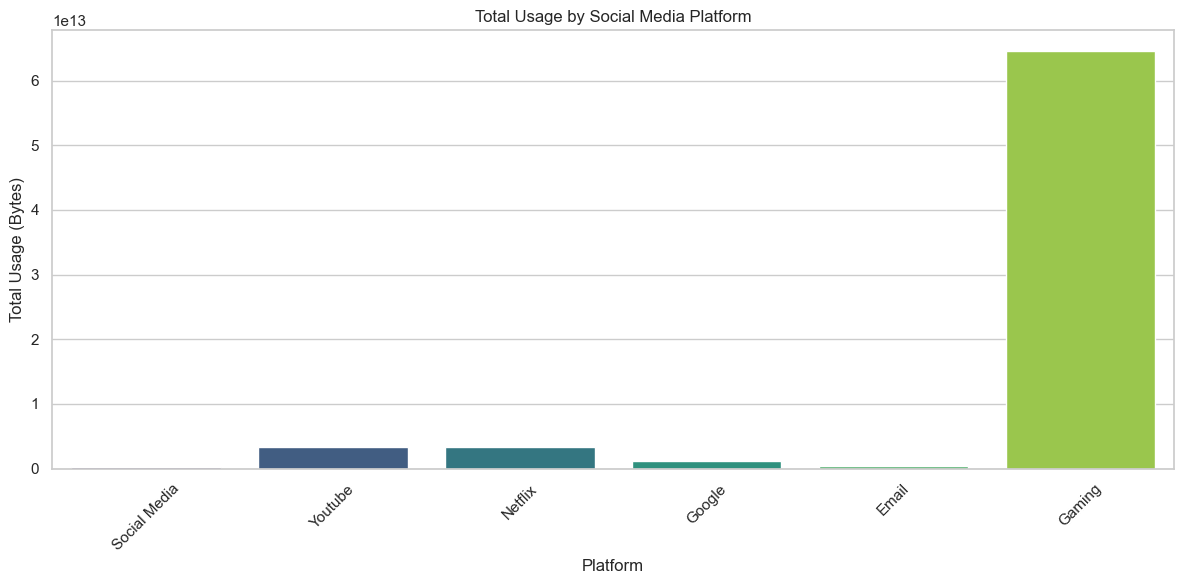

In [49]:

# Step 3: Visualize the Most Used Social Media Platform
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Total Usage (Bytes)', data=social_media_usage_df, palette='viridis')
plt.title('Total Usage by Social Media Platform')
plt.xlabel('Platform')
plt.ylabel('Total Usage (Bytes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
import pandas as pd

# Calculate the total data volume (Total Volume = total DL + total UL) for each user
aggregated_data['Total Volume (Bytes)'] = aggregated_data[[col for col in aggregated_data.columns if 'DL (Bytes)' in col or 'UL (Bytes)' in col]].sum(axis=1)

# Segment users into top five decile classes based on total session duration
aggregated_data['Decile'] = pd.qcut(aggregated_data['Total Session Duration (ms)'], q=5, labels=False, duplicates='drop')

# Filter for the top five deciles (deciles 0 to 4, where 4 is the highest)
top_deciles = aggregated_data[aggregated_data['Decile'] >= 0]

# Group by decile and calculate the sum of Total Volume (Bytes) for each decile class
decile_data = top_deciles.groupby('Decile')['Total Volume (Bytes)'].sum()

# Display the total data volume per decile class
print("Total Data Volume per Decile Class:")
print(decile_data)


Total Data Volume per Decile Class:
Decile
0    2.128360e+13
1    2.194630e+13
2    2.280563e+13
3    2.578600e+13
4    4.570916e+13
Name: Total Volume (Bytes), dtype: float64


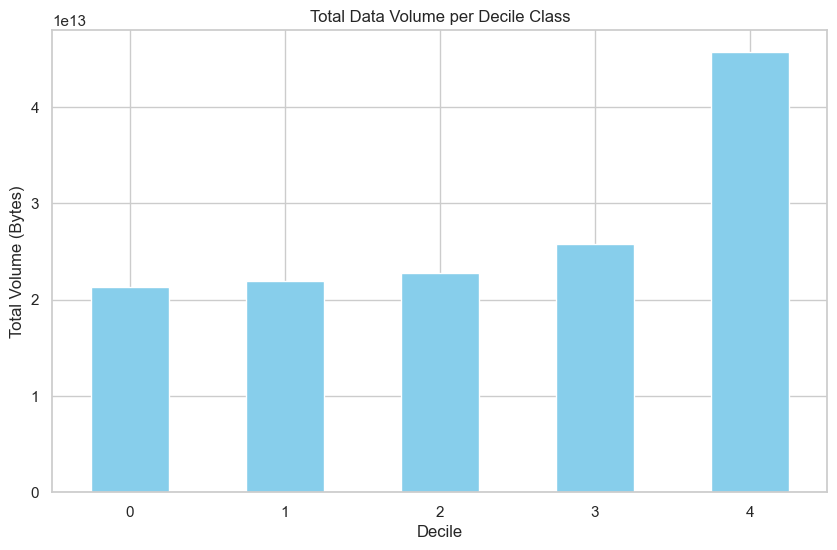

In [46]:
import matplotlib.pyplot as plt

# Bar plot of total data volume per decile
plt.figure(figsize=(10, 6))
decile_data.plot(kind='bar', color='skyblue')
plt.title('Total Data Volume per Decile Class')
plt.xlabel('Decile')
plt.ylabel('Total Volume (Bytes)')
plt.xticks(rotation=0)
plt.show()


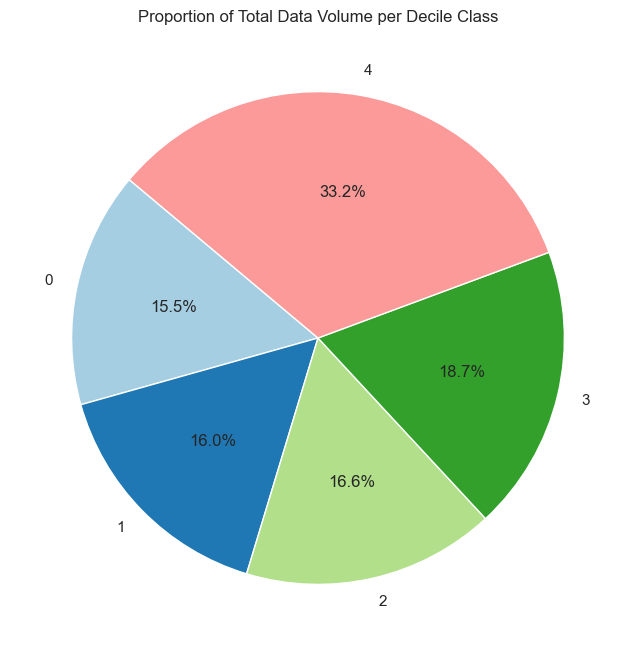

In [47]:
# Pie chart for decile distribution
plt.figure(figsize=(8, 8))
decile_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Total Data Volume per Decile Class')
plt.ylabel('')  # Hide the y-label
plt.show()
